# 3. Plotting for Exploratory data analysis (EDA)

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

#Assignment on Haberman Cancer Survival dataset#


In [2]:
from google.colab import files
files=files.upload()


Saving haberman.csv to haberman.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
data=pd.read_csv("haberman.csv")
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
print(data.shape)

(306, 4)


In [5]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
data['nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [8]:
data['age'].mean()

52.45751633986928

In [9]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


#2-D Scatter Plot:

*   A scatter plot is a visual representation of how two variables relate to each other. You can use scatter plots to explore the relationship between two variables, for example by looking for any correlation between them.




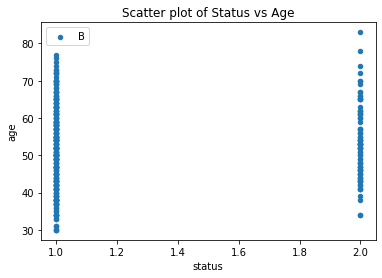

In [13]:
data.plot(kind='scatter',x='status', y='age',) ;
plt.title("Scatter plot of Status vs Age")
plt.legend('Blue Points')
plt.show()

Explanation: 2-D Scatter Plot- The age range with respect to The datapoints which has "status"=1, is between 30 to 80

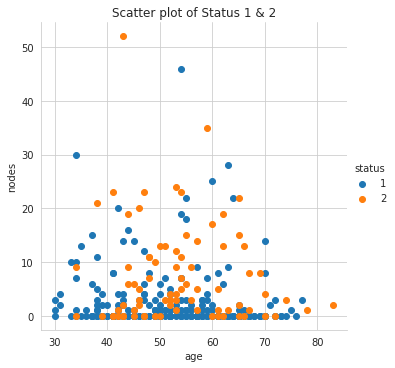

In [14]:
# 2-D Scatter plot with color-coding for each type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", size=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter plot of Status 1 & 2")
plt.show();

Observations:

Seperating Status 1 from  Status 2 is much harder as they have considerable overlap.
Some status points are far away from overlapped points

#3D Scatter Plot

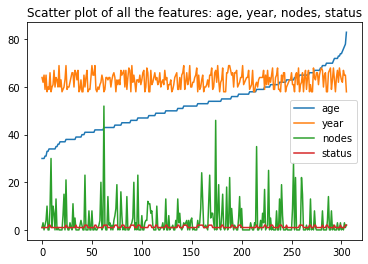

In [15]:
data.plot()
plt.title("Scatter plot of all the features: age, year, nodes, status")
plt.legend()
plt.show()

Explanation: This the complete overview of haberman dataset.

No handles with labels found to put in legend.


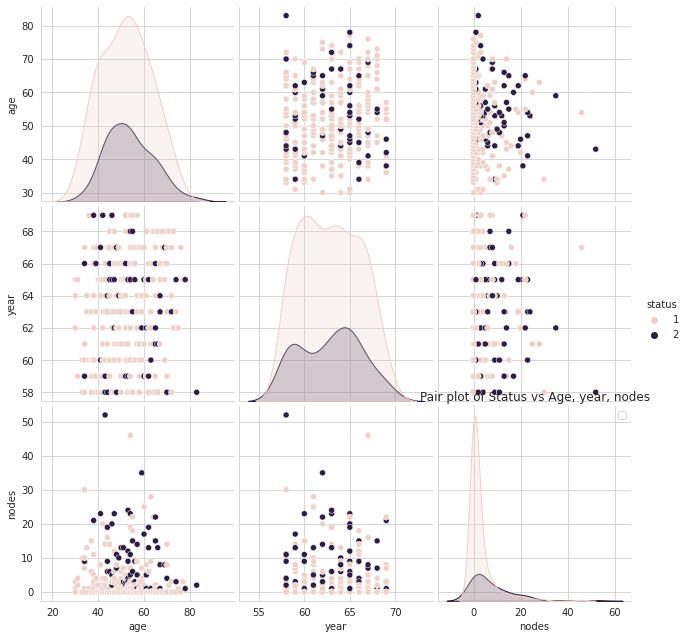

In [16]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", height=3);
plt.title("Pair plot of Status vs Age, year, nodes")
plt.legend()
plt.show()

Explanation: On the basis of every plot, we can state that status 1 points are overlapped with status 2 points. 

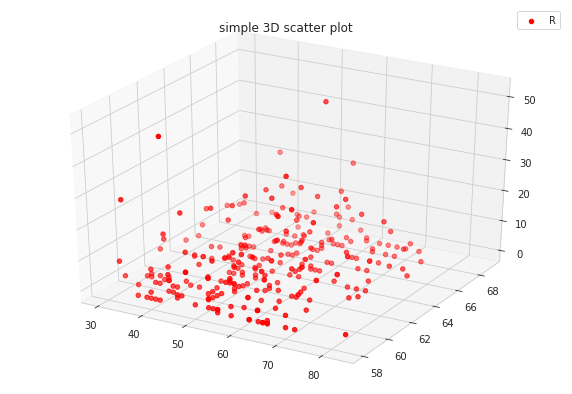

In [17]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.array(list(data['age']))
y = np.array(list(data['year']))
z = np.array(list(data['nodes']))

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "red")
plt.title("simple 3D scatter plot")
 
# show plot
plt.legend('Red Dots')
plt.show()

Explanation: Above 3-d scatter plot is a mathematical diagram, the most basic version of three-dimensional plotting used to display the properties of haberman dataset as three variables(age, year, nodes) of a dataset using the cartesian coordinates.

##Histogram, PDF, CDF

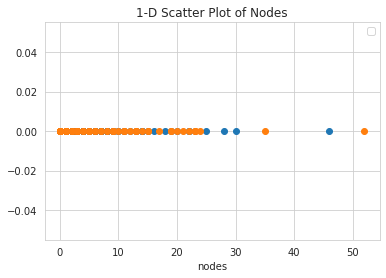

In [22]:
#1-D Scatter Plot:
import numpy as np

data_1 = data.loc[data["status"] == 1];
data_2 = data.loc[data["status"] == 2];

plt.plot(data_1["nodes"], np.zeros_like(data_1['nodes']), 'o')
plt.plot(data_2["nodes"], np.zeros_like(data_2['nodes']), 'o')
plt.xlabel("nodes")
plt.legend(data_1["nodes"],data_2["nodes"])
plt.title("1-D Scatter Plot of Nodes")
plt.show()

***Probability Density Function (PDF):***

* PDF is a function that allows us to calculate probabilities of finding a random variable in any interval which belongs to the sample space. It is important to remember that the probability of a continuous random variable taking an exact value is equal to 0.

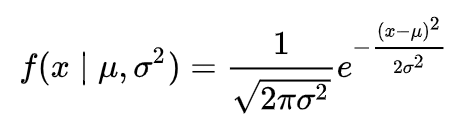




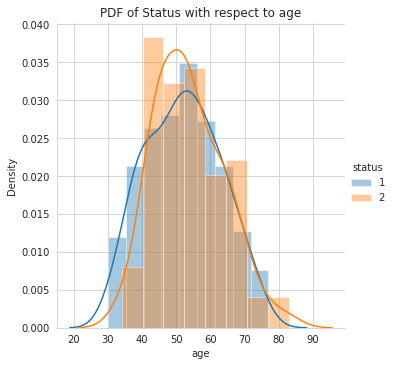

In [24]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF of Status with respect to age")
plt.show();

Explanation: The Age range of status 1 datapoints is from 34 to 82.
The age range of status 2 datapoints is from 30 to 78.
status 2, Most of the datapoints which lies age range between 40-50. 

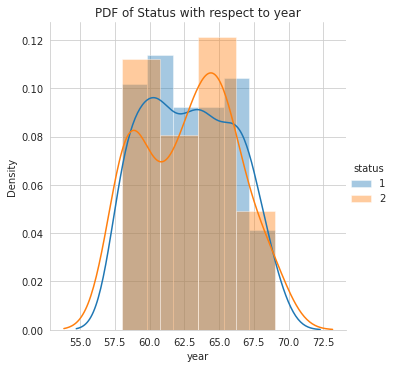

In [25]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF of Status with respect to year")
plt.show();

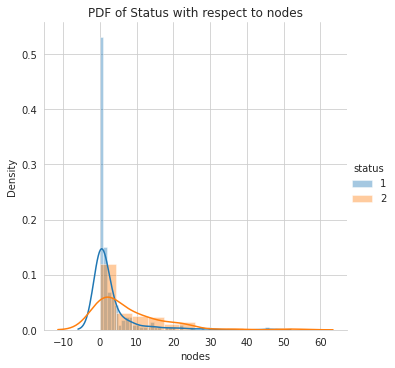

In [26]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF of Status with respect to nodes")
plt.show();

Status 1 data points at nodes 0-2 is large.

##Plot CDF of 'age' with respect to the Status=1

***Cumulative Distribution Function (CDF):***

* Cumulative distribution function (CDF) — a function that provides the probability of a random variable taking value equal or less than a given value x. When we are dealing with continuous variables, the CDF is the area under the PDF in the range of minus infinity to x.

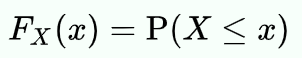




[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


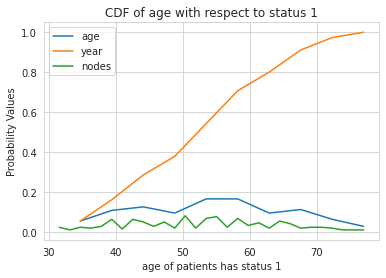

In [67]:
counts, bin_edges = np.histogram(data_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.ylabel("Probability Values")
plt.xlabel("age of patients has status 1")


counts, bin_edges = np.histogram(data_1['age'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.legend(data_1)
plt.title("CDF of age with respect to status 1")
plt.show();


##Plot CDF of 'year'

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


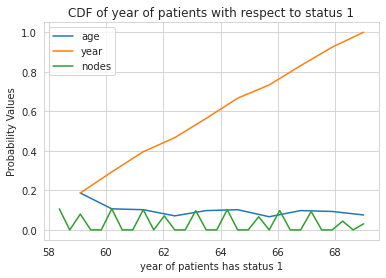

In [68]:
counts, bin_edges = np.histogram(data_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.ylabel("Probability Values")
plt.xlabel("year of patients has status 1")


counts, bin_edges = np.histogram(data_1['year'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("CDF of year of patients with respect to status 1")
plt.legend(data_1)
plt.show();


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


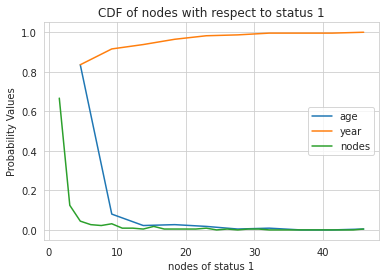

In [69]:
counts, bin_edges = np.histogram(data_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.ylabel("Probability Values")
plt.xlabel("nodes of status 1")


counts, bin_edges = np.histogram(data_1['nodes'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.legend(data_1)
plt.title("CDF of nodes with respect to status 1")
plt.show();


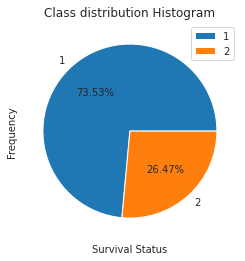

In [36]:
count_classes = pd.value_counts(data["status"])
count_classes.plot(kind = 'pie', autopct='%1.2f%%')
plt.title("Class distribution Histogram")
plt.xlabel("Survival Status")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Explanation: 73.53% people has status 1, while 26.47% of people has status 2. Hence, status 1 datapoints is almost 2.8 times higher than status 2 points.  

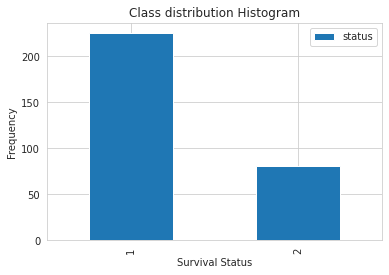

In [37]:
count_classes = pd.value_counts(data["status"])
count_classes.plot(kind = 'bar')
plt.title("Class distribution Histogram")
plt.xlabel("Survival Status")
plt.ylabel("Frequency")
plt.legend()
plt.show()

##Mean, Variance, Standard Deviation

In [ ]:
#Mean, Variance, Std-deviation,  

print("Means:")
print(np.mean(data_1["age"]))

#Mean with an outlier.
print(np.mean(np.append(data_1["age"],50)));
print(np.mean(data_2["age"]))


print("\nStd-dev:");
print(np.std(data_1["age"]))
print(np.std(data_2["age"]))



Means:
52.01777777777778
52.008849557522126
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


##Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(data_1["age"]))
#Median with an outlier
print(np.median(np.append(data_1["age"],50)));
print(np.median(data_2["age"]))


print("\nQuantiles:")
print(np.percentile(data_1["age"],np.arange(0, 100, 25)))
print(np.percentile(data_2["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(data_1["age"],90))
print(np.percentile(data_2["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(data_1["age"]))
print(robust.mad(data_2["age"]))




Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Box plot and Whiskers

***Box Plot and Whisker Plot:***

*   A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
*   In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

  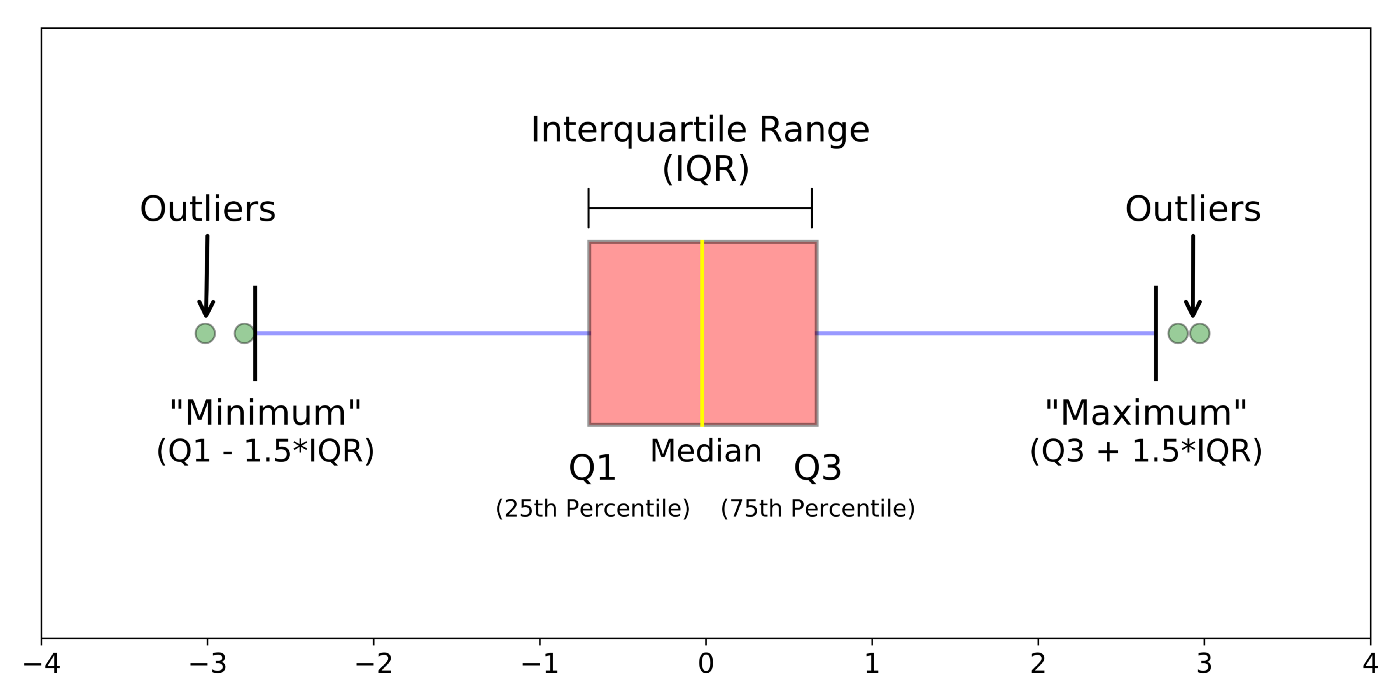
      






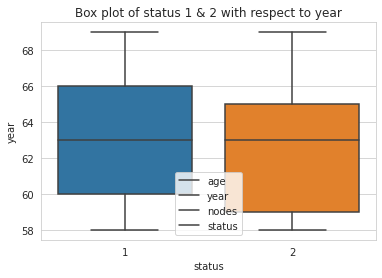

In [45]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='year', data=data)
plt.title("Box plot of status 1 & 2 with respect to year")
plt.legend(data)
plt.show()

For status 1, 25th- 75th Percentile: year 60 to year 66.
For Starus 2, 25th- 75th percentile: year 59 to year 65

##Violin plots:

*  A Violin Plot is used to visualise the distribution of the data and its probability density.


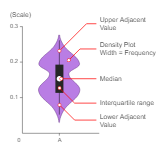



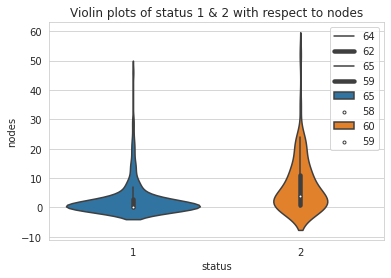

In [59]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=data, size=8)
plt.title("Violin plots of status 1 & 2 with respect to nodes")
plt.legend(y)
plt.show()

Nodes: In above violin plot we states that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20 and threshold from 0–12.

##Univariate, bivariate and multivariate analysis.

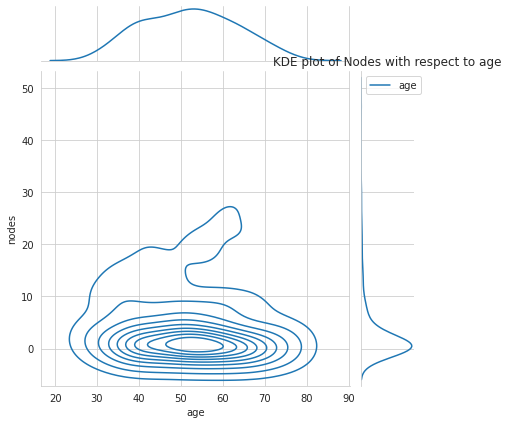

In [62]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=data_1, kind="kde");
plt.legend(data_1)
plt.title("KDE plot of Nodes with respect to age")
plt.show();

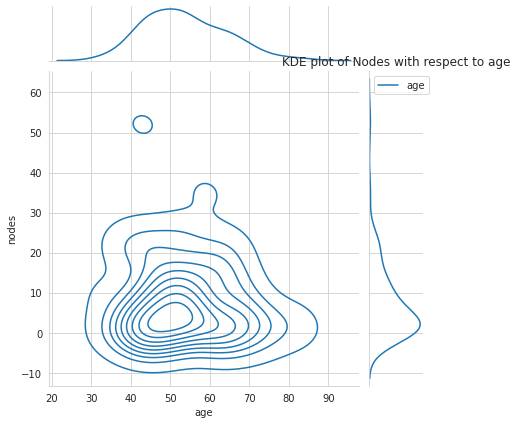

In [63]:
sns.jointplot(x="age", y="nodes", data=data_2, kind="kde");
plt.legend(data_2)
plt.title("KDE plot of Nodes with respect to age")
plt.show();

Above is the 2D density plot for long survival using feature age and nodes, it is observed the density of point for long survival is more from age range 47–60 and nodes from 0–3. The high density area which is hill top in 3D and density is getting low as graph get flatter.

In [ ]:
!pip install dtale

import dtale

     |████████████████████████████████| 10.9 MB 4.8 MB/s 
     |████████████████████████████████| 79.9 MB 51 kB/s 
     |████████████████████████████████| 642 kB 36.9 MB/s 
     |████████████████████████████████| 62 kB 934 kB/s 
     |████████████████████████████████| 47 kB 4.2 MB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 197 kB 52.6 MB/s 
     |████████████████████████████████| 7.3 MB 45.4 MB/s 
     |████████████████████████████████| 1.8 MB 34.6 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 357 kB 52.9 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=a8d4c2f403063eff62dc3771d0805d2e79d94a907079a2c65dee43542ae90ef4
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none

/usr/local/lib/python3.7/dist-packages/dtale/dash_application/charts.py:13: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/usr/local/lib/python3.7/dist-packages/dtale/dash_application/charts.py:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(data)

https://05lslfsonnv4-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

Please click on the link, and after that click on play arrow below the dtale logo, you will get the access for whole EDA. Its the best library I came across.

##Conclusion:


*   Yes, you can analyze the Cancer using Haberman’s Data set by applying various data visualization techniques and using various Python libraries.
*   The dataset is highly imbalanced as it does not contains equal number of data-points for each class. 
*   The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.
*   We can not build simple model using only if else condition, we need to establish complex techniques to handle this imbalanced dataset.




